## **EDA - Dataset de Reseñas de Google**

#### Este análisis exploratorio de datos se centra en el dataset de reseñas de Google, que contiene reseñas de usuarios sobre diversos negocios en estados seleccionados de EE.UU., según el alcance de nuestro proyecto. 
#### El objetivo es comprender las características del dataset, identificar patrones y relaciones importantes, y explorar la distribución de las calificaciones para obtener insights iniciales. Este análisis ayudará a determinar el grado de satisfacción del cliente y posibles estacionalidades en las reseñas.

#### **Descripción de las Columnas**


- **review_id**: Identificador único de cada reseña.
- **id_negocio**: Identificador del negocio al que pertenece la reseña.
- **estado**: Estado de EE.UU. donde se ubica el negocio.
- **user_id**: Identificador del usuario que dejó la reseña.
- **name**: Nombre del usuario.
- **time**: Fecha de la reseña.
- **rating**: Calificación otorgada por el usuario (escala de 1 a 5).
- **text**: Texto de la reseña.
- **resp_text**: Respuesta del negocio a la reseña (si existe).
- **resp_time**: Fecha de la respuesta del negocio (si existe).

#### **Enfoque de Análisis**

1. **Análisis Descriptivo Inicial**:
   - **Valores nulos**: Verificación de valores nulos en cada columna, especialmente en `**resp_text**` y `**resp_time**`.
   - **Estadísticas descriptivas**: Análisis de la columna `**rating**`.
   - **Distribución por estado**: Conteo de reseñas por cada estado.

2. **Análisis Temporal**:
   - Exploración de tendencias en las reseñas para identificar posibles patrones de estacionalidad y tendencias en cantidad y calificación a lo largo del tiempo.

3. **Distribución de Ratings**:
   - Observación de la distribución de calificaciones para identificar los niveles de satisfacción general de los usuarios.

4. **Análisis de Texto**:
   - **Limpieza y procesamiento** de las reseñas para facilitar el análisis.
   - **Exploración de palabras clave** y patrones frecuentes en los comentarios.
   - **Análisis de sentimientos** para identificar la polaridad de las reseñas.

### **Objetivo**
#### El objetivo es proporcionar un entendimiento profundo de las reseñas, identificar tendencias y áreas de oportunidad en la satisfacción del cliente, y establecer una base sólida para la toma de decisiones en el área de Analytics.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [3]:
reviews = pd.read_parquet("C:\DYNAMO\PFinal\Proyecto_final\Datos\g_5_estados_seleccionados.parquet")

In [4]:
reviews.shape

(258598, 10)

In [5]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258598 entries, 0 to 258597
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   review_id   258598 non-null  int64         
 1   id_negocio  258598 non-null  object        
 2   estado      258598 non-null  object        
 3   user_id     258598 non-null  object        
 4   name        258598 non-null  object        
 5   time        258598 non-null  datetime64[ns]
 6   rating      258598 non-null  int64         
 7   text        150731 non-null  object        
 8   resp_text   38007 non-null   object        
 9   resp_time   38007 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 19.7+ MB


In [6]:
reviews.head()

,review_id,id_negocio,estado,user_id,name,time,rating,text,resp_text,resp_time
0,1,0x89c259cfd197c453:0xd566a7f7fabd5c07,New York,1.0965662686847784e+20,Lee Yong June,2018-12-02,5,I was looking for a place to eat some oyster a...,None,NaT
1,2,0x89c259cfd197c453:0xd566a7f7fabd5c07,New York,1.0894034449734338e+20,D Liwer,2020-03-03,5,"I'm not one to gush, but this place is insanel...",None,NaT
2,3,0x89c259cfd197c453:0xd566a7f7fabd5c07,New York,1.1258287891163913e+20,Brittany Miller,2020-05-26,5,"I loved the all-day, everyday happy hour over ...",None,NaT
3,4,0x89c259cfd197c453:0xd566a7f7fabd5c07,New York,1.0159239659374254e+20,Anne Sophie Kiepe,2019-05-17,3,"Yummy, crispy hand rolls in a swanky space wit...",None,NaT
4,5,0x89c259cfd197c453:0xd566a7f7fabd5c07,New York,1.1032756689421497e+20,Pablo Trigo Mouriño,2020-02-16,5,"Fair price and quite good oysters, try the fri...",None,NaT


### **Análisis de Valores Nulos**
- ##### **``text``:** La columna text tiene 107,867 valores nulos, indicando que muchos usuarios dejaron una calificación sin escribir un comentario. Esto es importante, ya que los análisis de texto (como el análisis de sentimientos) solo podrán realizarse con las reseñas que contengan texto.
- ##### **``resp_text``** y **``resp_time``:** Ambas columnas tienen 220,591 valores nulos, lo que significa que la mayoría de las reseñas no tienen una respuesta por parte del negocio. Esto podría ser un factor a investigar para ver si las reseñas respondidas tienden a tener calificaciones diferentes.
### **Estadísticas de rating**
- ##### **Media:** La media de la calificación es **4.38**, indicando una tendencia general de satisfacción positiva.
- ##### **Desviación Estándar:** La desviación estándar es **1.04**, lo que sugiere que las calificaciones tienen cierta variabilidad, pero tienden hacia el rango superior (4-5).
- ##### **Mediana:** La mediana de las calificaciones es 5, y el 75% de las calificaciones también está en 5, lo cual confirma que la mayoría de las reseñas son positivas.
- ##### **Rango Completo:** Las calificaciones van de 1 a 5, cubriendo todo el espectro disponible. 
### **Distribución de Reseñas por Estado**
- ##### **Florida**: 76,929 reseñas
- ##### **New York:** 62,093 reseñas
- ##### **California**: 45,350 reseñas
- ##### **Pennsylvania**: 37,113 reseñas
- ##### **Texas**: 37,133 reseñas

In [7]:
# Verificar valores nulos en cada columna
null_values = reviews.isnull().sum()

# Estadísticas descriptivas de la columna 'rating'
rating_stats = reviews['rating'].describe()


# Mostrar resultados
print(null_values, "\n")
print(rating_stats, "\n")

review_id          0
id_negocio         0
estado             0
user_id            0
name               0
time               0
rating             0
text          107867
resp_text     220591
resp_time     220591
dtype: int64 

count    258598.000000
mean          4.375293
std           1.042691
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64 



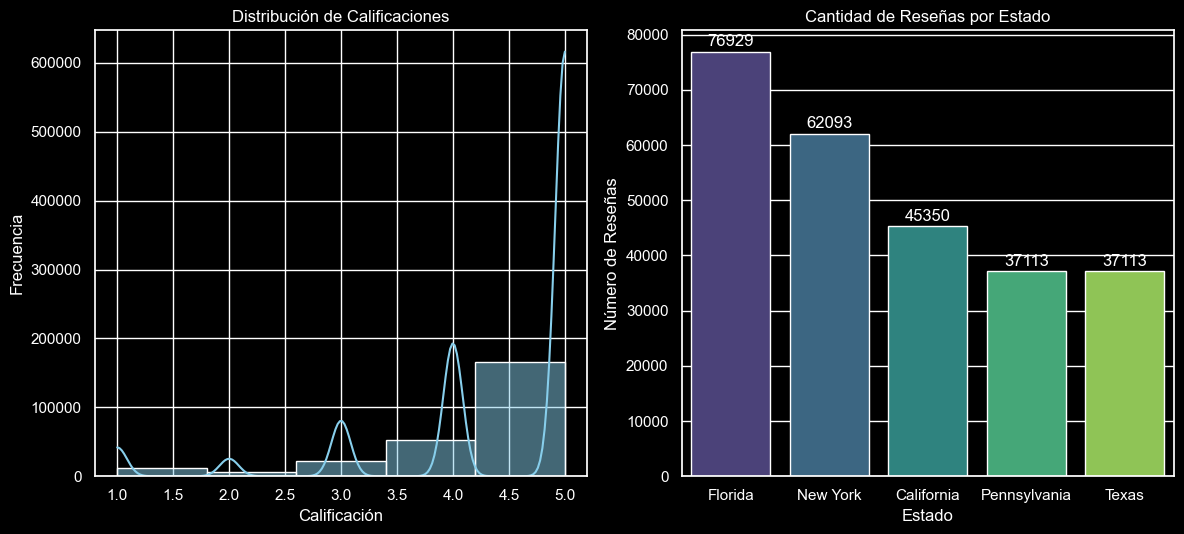

In [9]:
# Configuración del estilo de los gráficos
sns.set_theme(style="darkgrid")

# Crear una figura con dos subplots uno al lado del otro
fig, axes = plt.subplots(1, 2, figsize=(12, 5.5))

# Cambiar el fondo de los subplots a negro
fig.patch.set_facecolor('black')
axes[0].set_facecolor('black')
axes[1].set_facecolor('black')

# Gráfico 1: Distribución de Calificaciones
sns.histplot(reviews['rating'], bins=5, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title("Distribución de Calificaciones", color='white')
axes[0].set_xlabel("Calificación", color='white')
axes[0].set_ylabel("Frecuencia", color='white')

# Calcular la cantidad de reseñas por estado
reviews_by_state = reviews['estado'].value_counts()

# Gráfico 2: Cantidad de Reseñas por Estado
sns.barplot(x=reviews_by_state.index, y=reviews_by_state.values, palette="viridis", ax=axes[1])
axes[1].set_title("Cantidad de Reseñas por Estado", color='white')
axes[1].set_xlabel("Estado", color='white')
axes[1].set_ylabel("Número de Reseñas", color='white')

# Añadir etiquetas de frecuencia encima de cada barra
for p in axes[1].patches:
    axes[1].annotate(f'{int(p.get_height())}',  # Añadir la altura de la barra como etiqueta
                     (p.get_x() + p.get_width() / 2., p.get_height()),  # Posición de la etiqueta
                     ha='center', va='center',  # Alineación horizontal y vertical
                     xytext=(0, 7),  # Desplazamiento de la etiqueta
                     textcoords='offset points',  # Coordenadas de desplazamiento
                     color='white')  # Color de la etiqueta

# Cambiar el color de los ejes y las etiquetas a blanco
for ax in axes:
    ax.tick_params(colors='white')  # Cambiar el color de las marcas de los ejes
    for spine in ax.spines.values():
        spine.set_edgecolor('white')  # Cambiar el color de los bordes de los ejes

# Ajustar el layout para una mejor visualización
plt.tight_layout()
plt.show()

## **Análisis de la Cantidad de Reseñas por Mes (Desde 2021)**



#### **Alta Actividad a Inicios de 2021:**

##### Los primeros cinco meses de 2021 (enero a mayo) muestran un volumen alto y relativamente constante de reseñas, con un pico en marzo (4,842 reseñas).
##### Esto puede indicar un aumento en la actividad de reseñas tras el comienzo de la reactivación post-pandemia, posiblemente debido a la reapertura de negocios y el aumento en el turismo o actividades sociales.

### **Disminución en el Verano:**
##### A partir de junio, la cantidad de reseñas comienza a disminuir de forma notable, bajando a 2,566 en junio y a menos de 1,000 en julio y agosto.
##### Esto podría estar relacionado con factores estacionales, o incluso a nuevas restricciones por nuevas mutaciones del COVID.
### **Práctica Desaparición en Septiembre:**

##### En septiembre, la actividad de reseñas prácticamente desaparece, con solo 16 reseñas registradas.
##### Esta caída drástica podría ser un efecto del dataset, quizás debido a una falta de datos o una baja natural en la actividad.

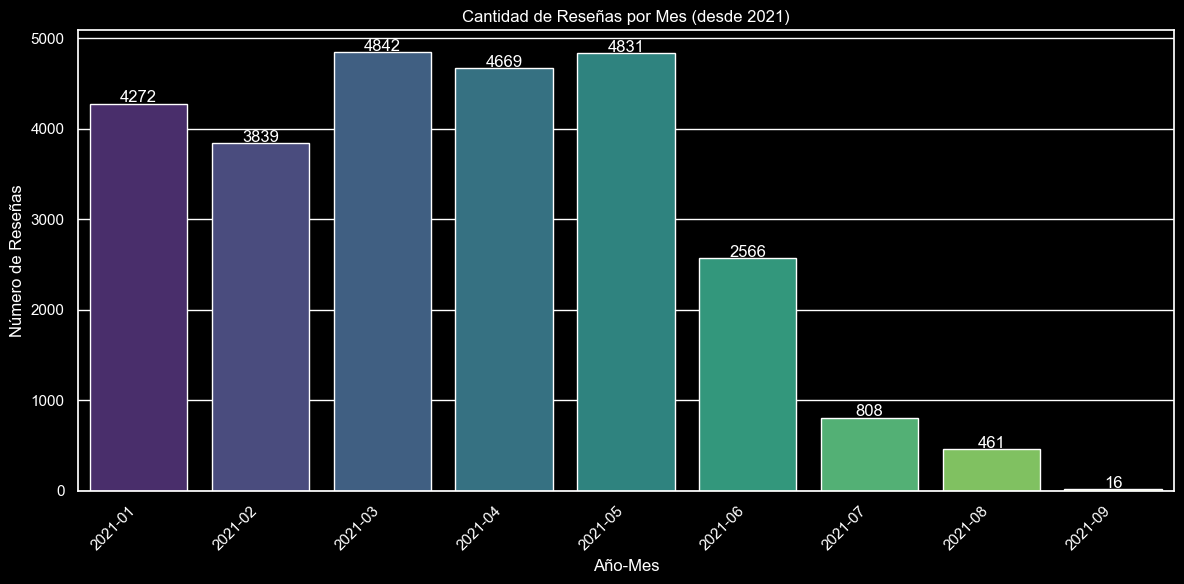

In [10]:
# Filtrar datos desde 2021
reviews_2021 = reviews[reviews['time'].dt.year >= 2021]

# Crear una columna de año-mes para agrupar
reviews_2021['year_month'] = reviews_2021['time'].dt.to_period('M')

# Calcular el número de reseñas por mes
reviews_per_month = reviews_2021.groupby('year_month').size().reset_index(name='count')

# Configuración del estilo de los gráficos
sns.set_theme(style="darkgrid")

# Crear el gráfico de cantidad de reseñas por mes
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='year_month', y='count', data=reviews_per_month, palette='viridis')

# Cambiar el fondo del gráfico a negro
ax.set_facecolor('black')
plt.gcf().set_facecolor('black')

# Configurar títulos y etiquetas con color blanco
ax.set_title("Cantidad de Reseñas por Mes (desde 2021)", color='white')
ax.set_xlabel("Año-Mes", color='white')
ax.set_ylabel("Número de Reseñas", color='white')

# Cambiar el color de las etiquetas de los ejes a blanco
ax.tick_params(colors='white')
for spine in ax.spines.values():
    spine.set_edgecolor('white')

# Añadir etiquetas de frecuencia encima de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Añadir la altura de la barra como etiqueta
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posición de la etiqueta
                ha='center', va='center',  # Alineación horizontal y vertical
                xytext=(0, 4.3),  # Desplazamiento de la etiqueta
                textcoords='offset points',  # Coordenadas de desplazamiento
                color='white')  # Color de la etiqueta

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Ajustar el layout para una mejor visualización
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## **Análisis de la Calificación Promedio por Mes**
#### **Estabilidad en la Calificación Alta:**

- ##### La calificación promedio se mantiene bastante estable, con valores alrededor de 4.48 a 4.50 en los primeros meses de 2021.
- ##### Esto sugiere que la percepción general de los usuarios ha sido positiva de forma consistente.
#### **Incremento en Julio y Agosto:**

- ##### En julio y agosto, hay un ligero aumento en la calificación promedio, alcanzando un pico de 4.55 en agosto.
- ##### Este incremento podría estar relacionado con una mayor satisfacción en ese periodo, tal vez por una mejora en los servicios o una percepción más favorable en ciertos negocios.
#### **Caída Abrupta en Septiembre:**

- ##### En septiembre, la calificación promedio cae significativamente a 4.38.
- ##### Dado que en septiembre también observamos una fuerte disminución en la cantidad de reseñas, este cambio podría deberse a un número limitado de reseñas, lo cual puede hacer que los valores promedio sean más volátiles.
##### Este gráfico sugiere que, aunque la satisfacción ha sido consistentemente alta, existen ligeras variaciones mensuales que podrían relacionarse con cambios estacionales o situaciones específicas de cada periodo.

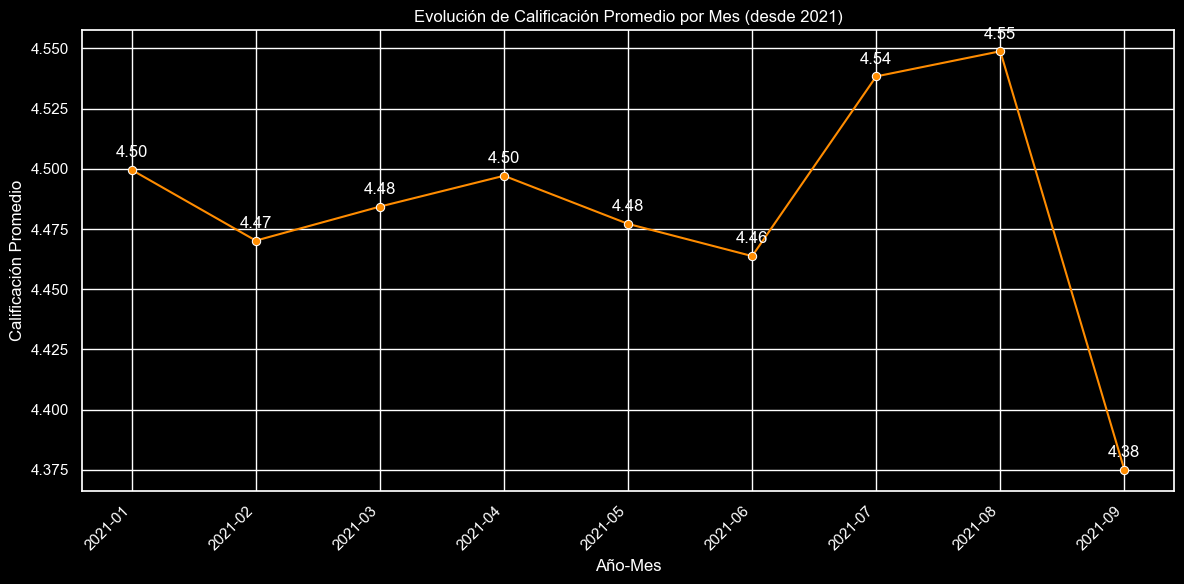

In [11]:
# Filtrar datos desde 2021
reviews_2021 = reviews[reviews['time'].dt.year >= 2021]

# Crear una columna de año-mes para agrupar
reviews_2021['year_month'] = reviews_2021['time'].dt.to_period('M')

# Calcular la calificación promedio por mes
average_rating_per_month = reviews_2021.groupby('year_month')['rating'].mean().reset_index()

# Convertir la columna year_month a cadena de texto para evitar problemas con la visualización
average_rating_per_month['year_month'] = average_rating_per_month['year_month'].astype(str)

# Configuración del estilo de los gráficos
sns.set_theme(style="darkgrid")

# Crear el gráfico de calificación promedio por mes
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x='year_month', y='rating', data=average_rating_per_month, marker='o', color='darkorange')

# Cambiar el fondo del gráfico a negro
ax.set_facecolor('black')
plt.gcf().set_facecolor('black')

# Configurar títulos y etiquetas con color blanco
ax.set_title("Evolución de Calificación Promedio por Mes (desde 2021)", color='white')
ax.set_xlabel("Año-Mes", color='white')
ax.set_ylabel("Calificación Promedio", color='white')

# Cambiar el color de las etiquetas de los ejes a blanco
ax.tick_params(colors='white')
for spine in ax.spines.values():
    spine.set_edgecolor('white')

# Añadir etiquetas de calificación promedio encima de cada punto
for x, y in zip(average_rating_per_month['year_month'], average_rating_per_month['rating']):
    ax.annotate(f'{y:.2f}',  # Añadir la calificación promedio como etiqueta
                (x, y),  # Posición de la etiqueta
                ha='center', va='bottom',  # Alineación horizontal y vertical
                xytext=(0, 7),  # Desplazamiento de la etiqueta
                textcoords='offset points',  # Coordenadas de desplazamiento
                color='white')  # Color de la etiqueta

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Ajustar el layout para una mejor visualización
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## **Análisis de la Distribución de Ratings (Desde 2021)**
#### **Predominio de Calificaciones Altas:**

##### La gran mayoría de las reseñas tienen una calificación de **5**, con un total de 18,749 reseñas, seguido por calificaciones de 4 con 4,271 reseñas. Esto refuerza la idea de que los usuarios están mayormente satisfechos con los servicios o productos evaluados.
#### **Calificaciones Bajas en Minoría:**
##### Las calificaciones de 1 y 2 son muy poco frecuentes, con solo 1,046 y 579 reseñas respectivamente. Esto sugiere que las experiencias negativas son menos comunes en comparación con las positivas.
#### **Calificación Neutra Baja:**

##### Las reseñas con una calificación de 3, que podrían considerarse neutras, también son relativamente pocas (1,659), lo cual indica que las reseñas tienden a ser más polarizadas, con una inclinación hacia lo positivo.
##### Esta distribución es muy positiva para el análisis de satisfacción general, mostrando que el dataset refleja una percepción mayoritariamente favorable.

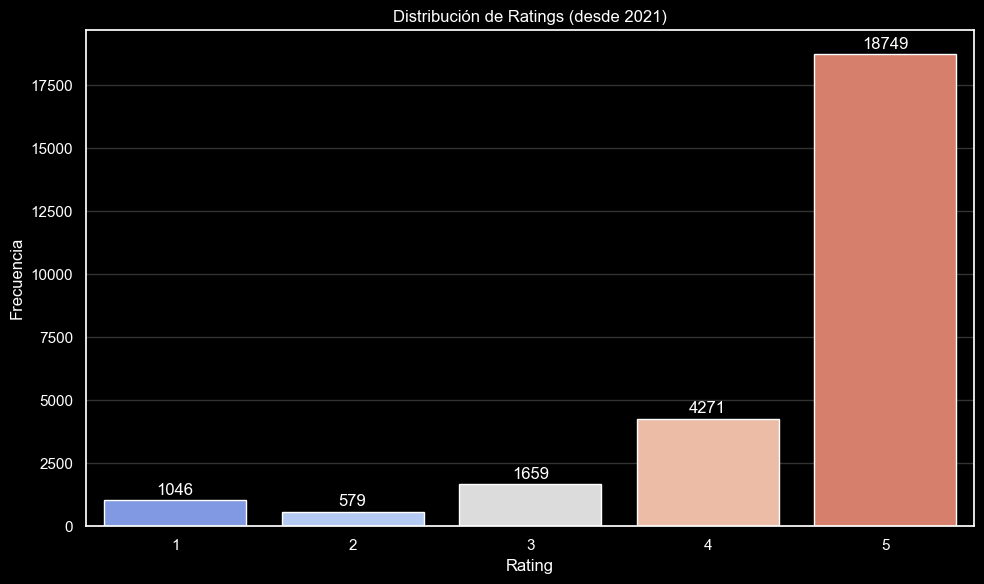

In [39]:
# Configuración del estilo de los gráficos
sns.set_theme(style="darkgrid")

# Crear el gráfico de barras para la distribución de ratings
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='rating', data=reviews_2021, palette='coolwarm')

# Cambiar el fondo del gráfico a negro
ax.set_facecolor('black')
plt.gcf().set_facecolor('black')

# Configurar títulos y etiquetas con color blanco
ax.set_title("Distribución de Ratings (desde 2021)", color='white')
ax.set_xlabel("Rating", color='white')
ax.set_ylabel("Frecuencia", color='white')

# Cambiar el color de las etiquetas de los ejes a blanco
ax.tick_params(colors='white')
for spine in ax.spines.values():
    spine.set_edgecolor('white')

# Añadir etiquetas de frecuencia encima de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Añadir la altura de la barra como etiqueta
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posición de la etiqueta
                ha='center', va='center',  # Alineación horizontal y vertical
                xytext=(0, 7),  # Desplazamiento de la etiqueta
                textcoords='offset points',  # Coordenadas de desplazamiento
                color='white')  # Color de la etiqueta

# Ajustar el layout para una mejor visualización
plt.tight_layout()
plt.show()


## **Análisis de texto**



In [40]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Definir las palabras vacías en inglés
stop_words = set(stopwords.words('english'))

# Función para limpiar texto
def clean_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar caracteres especiales
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenización
    words = word_tokenize(text)
    # Eliminar palabras vacías
    words = [word for word in words if word not in stop_words]
    # Unir palabras
    return ' '.join(words)

# Aplicar la función de limpieza a la columna 'text' en las reseñas que no son nulas
reviews_2021['cleaned_text'] = reviews_2021['text'].dropna().apply(clean_text)


### **Análisis de Palabras Clave en las Reseñas**
#### **Términos Positivos y Relacionados con el Servicio:**

##### Las palabras más destacadas incluyen **`great`**, **`good`**, **``service``**, **``friendly``**, **``staff``**, y **``nice``**, lo cual refleja una percepción positiva general. Estos términos sugieren que muchos clientes valoran la calidad del servicio y la atención al cliente.
#### **Enfoque en la Experiencia y el Ambiente:**

##### Palabras como **``place``**, **``food``**, **``time``**, y **``clean``** también son recurrentes, indicando que los aspectos relacionados con el ambiente y la limpieza son importantes para los usuarios.
#### **Palabras Asociadas a Experiencias y Recomendaciones:**

##### Palabras como **``highly``** (en el contexto de "highly recommend") y **``best``** sugieren que muchos usuarios están recomendando estos lugares, lo cual es positivo para los negocios.
##### Este análisis confirma una tendencia de satisfacción en las reseñas, donde los clientes destacan aspectos del servicio, el ambiente y la calidad del producto o experiencia.

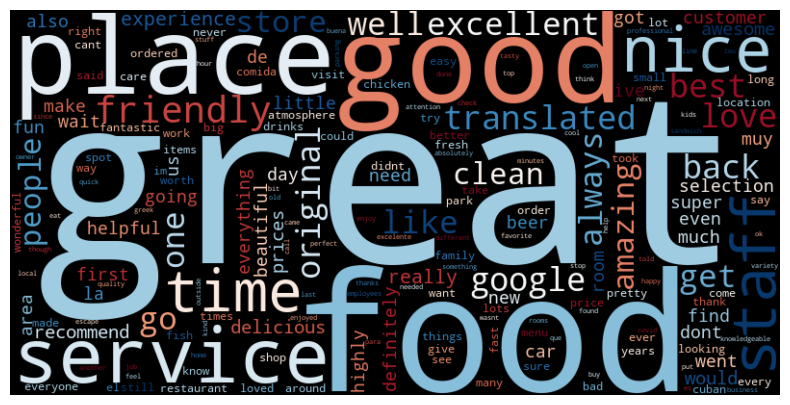

In [53]:
from collections import Counter
from wordcloud import WordCloud

# Concatenar todas las reseñas limpias en un solo texto
all_words = ' '.join(reviews_2021['cleaned_text'].dropna())

# Contar la frecuencia de cada palabra
word_counts = Counter(all_words.split())

# Crear una nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='RdBu').generate_from_frequencies(word_counts)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### **Análisis de la Distribución de la Polaridad en las Reseñas**
#### **Tendencia hacia la Polaridad Positiva:**

- ##### La mayor parte de las reseñas presentan una polaridad entre 0.0 y 0.5, con un pico en torno a 0.25, lo que indica que el sentimiento general de las reseñas es ligeramente positivo.
- ##### También se observa una buena cantidad de reseñas con una polaridad de 0.5, lo cual respalda la tendencia hacia opiniones favorables.
#### **Polaridad Neutral y Ligeramente Negativa:**
- ##### Un número menor de reseñas tiene polaridades cercanas a 0.0, que representan sentimientos neutrales.
- ##### Las polaridades negativas son menos frecuentes en el dataset, lo cual es consistente con el análisis general de satisfacción que hemos observado en las calificaciones.
#### **Picos en la Polaridad Positiva Alta:**

- ##### Se detectan picos en el rango positivo alto (0.75 y 1.0), lo que indica la presencia de algunas reseñas con un sentimiento muy positivo, aunque estas son menos comunes en comparación con el resto.
##### Este análisis sugiere que, en general, los usuarios tienen una percepción positiva de los servicios, con pocas reseñas que expresen opiniones negativas.

In [54]:
from textblob import TextBlob

# Función para obtener la polaridad y subjetividad de cada reseña
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Aplicar la función a las reseñas limpias
reviews_2021[['polarity', 'subjectivity']] = reviews_2021['cleaned_text'].apply(lambda x: analyze_sentiment(x) if pd.notnull(x) else (None, None)).apply(pd.Series)


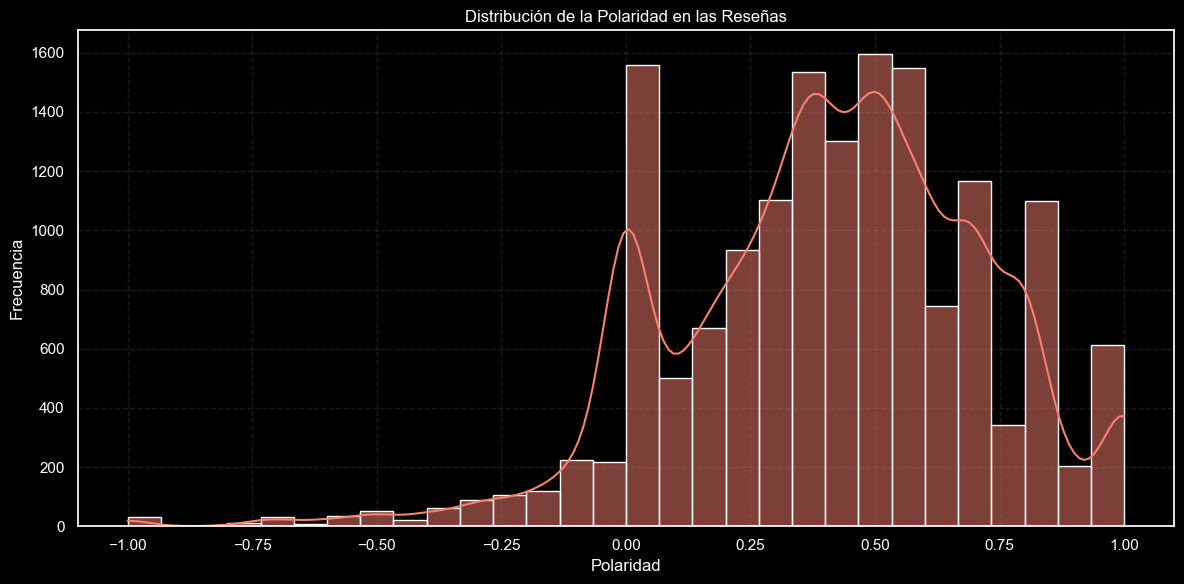

In [55]:
# Configuración del estilo de los gráficos con líneas de cuadrícula más visibles
sns.set_theme(style="darkgrid", rc={"grid.color": "gray", "grid.linestyle": "--", "grid.alpha": 0.2})

# Crear el histograma de polaridad
plt.figure(figsize=(12, 6))
ax = sns.histplot(reviews_2021['polarity'].dropna(), bins=30, kde=True, color='salmon')

# Cambiar el fondo del gráfico a negro
ax.set_facecolor('black')
plt.gcf().set_facecolor('black')

# Configurar títulos y etiquetas con color blanco
ax.set_title("Distribución de la Polaridad en las Reseñas", color='white')
ax.set_xlabel("Polaridad", color='white')
ax.set_ylabel("Frecuencia", color='white')

# Cambiar el color de las etiquetas de los ejes a blanco
ax.tick_params(colors='white')
for spine in ax.spines.values():
    spine.set_edgecolor('white')

# Ajustar el layout para una mejor visualización
plt.tight_layout()

# Mostrar el gráfico
plt.show()

### **Análisis de la Polaridad Promedio por Mes**
#### **Estabilidad Inicial en el Sentimiento Positivo:**
- ##### De enero a abril, la polaridad promedio se mantiene estable en torno a 0.4, lo que indica un sentimiento positivo constante durante estos meses.
#### **Disminución Gradual a Partir de Mayo:**

- ##### A partir de mayo, la polaridad promedio comienza a disminuir de forma gradual, con un descenso notable hacia los meses de agosto y septiembre.
- ##### Esta disminución puede sugerir un leve cambio en la satisfacción de los usuarios o en su percepción hacia los servicios en estos meses.
#### **Caída Abrupta en Septiembre:**

- ##### En septiembre, la polaridad promedio cae significativamente. Este cambio podría estar relacionado con el menor número de reseñas en ese mes, lo que hace que la polaridad promedio sea más susceptible a variaciones extremas.

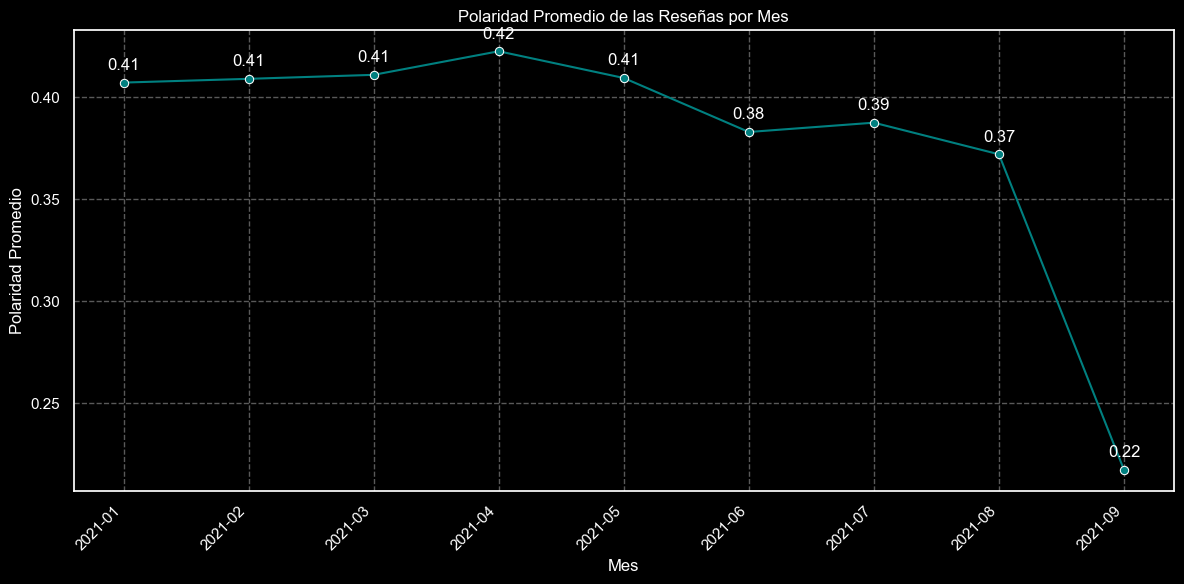

In [56]:
# Calcular la polaridad promedio por mes
monthly_sentiment = reviews_2021.groupby('year_month')['polarity'].mean().reset_index()

# Convertir la columna year_month a cadena de texto
monthly_sentiment['year_month'] = monthly_sentiment['year_month'].astype(str)

# Configuración del estilo de los gráficos con líneas de cuadrícula más visibles
sns.set_theme(style="darkgrid", rc={"grid.color": "gray", "grid.linestyle": "--", "grid.alpha": 0.7})

# Crear el gráfico de polaridad promedio por mes
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x='year_month', y='polarity', data=monthly_sentiment, marker='o', color='teal')

# Cambiar el fondo del gráfico a negro
ax.set_facecolor('black')
plt.gcf().set_facecolor('black')

# Configurar títulos y etiquetas con color blanco
ax.set_title("Polaridad Promedio de las Reseñas por Mes", color='white')
ax.set_xlabel("Mes", color='white')
ax.set_ylabel("Polaridad Promedio", color='white')

# Cambiar el color de las etiquetas de los ejes a blanco
ax.tick_params(colors='white')
for spine in ax.spines.values():
    spine.set_edgecolor('white')

# Añadir etiquetas de polaridad promedio encima de cada punto
for x, y in zip(monthly_sentiment['year_month'], monthly_sentiment['polarity']):
    ax.annotate(f'{y:.2f}',  # Añadir la polaridad promedio como etiqueta
                (x, y),  # Posición de la etiqueta
                ha='center', va='bottom',  # Alineación horizontal y vertical
                xytext=(0, 7),  # Desplazamiento de la etiqueta
                textcoords='offset points',  # Coordenadas de desplazamiento
                color='white')  # Color de la etiqueta

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Ajustar el layout para una mejor visualización
plt.tight_layout()

# Mostrar el gráfico
plt.show()